<a href="https://colab.research.google.com/github/yuliyahilevich/Employee-Attrition-Analysis/blob/main/Employee_Attrition_Analysis_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Attrition Analysis and Prediction**

## **Introduction**
Employee attrition is a critical issue for organizations, as it directly impacts productivity, team morale, and financial performance. By analyzing behavioral, demographic, and job-related factors, businesses can gain valuable insights into why employees leave and develop strategies to improve retention and engagement.

In this project, we utilize the **HR Analytics Employee Attrition & Performance dataset** to explore patterns and drivers of employee turnover. Through this analysis, we aim to uncover actionable insights to help organizations retain talent while fostering employee satisfaction and well-being.

---

## **Objectives**
- **Analyze employee attributes** to identify key factors influencing attrition.
- **Perform Exploratory Data Analysis (EDA)** to uncover trends related to job satisfaction, tenure, and other variables.
- **Build predictive models** using Logistic Regression and Random Forests to assess the likelihood of employee turnover.
- **Highlight key drivers** of attrition using feature importance analysis.
- **Multivariate Regression** and  for Job Satisfaction and **ANOVA** for Job Satisfaction across departments.


---

## **Dataset**
The dataset used for this project is the **HR Analytics Employee Attrition & Performance dataset**, which includes:
- Employee demographic information (e.g., Age, Gender, Education).
- Job-related data (e.g., Job Role, Department, Tenure).
- Satisfaction and performance metrics (e.g., Job Satisfaction, Work-Life Balance).
- Attrition labels to indicate whether an employee has left the company.

---



##**Data Preparation**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import f_oneway
from sklearn.linear_model import LogisticRegression
from google.colab import files
from imblearn.over_sampling import SMOTE
!pip install lime
from lime.lime_tabular import LimeTabularExplainer
import plotly.graph_objs as go
!pip install imblearn


In [47]:
# Import the dataset directly into Google Colab
uploaded = files.upload("/Users/yuliyahilevich/Desktop/HR.csv")

Saving HR.csv to /Users/yuliyahilevich/Desktop/HR.csv/HR (1).csv


In [65]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/yuliyahilevich/Desktop/HR.csv/HR.csv')
df_copy = df.copy()  # Keep a copy for referencing later

# Exploratory Data Analysis

In [4]:
# Display the first few rows of the DataFrame
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [5]:
# Duplicates check
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
print("NaN values in dataset:")
print(df.isna().sum())

NaN values in dataset:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRol

In [8]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:
# Summary statistics for categorical columns
df.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


Let's drop the variables that are not including any extra meaning ie ID etc



In [10]:
# Drop irrelevant columns that do not contribute to analysis
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
print('We have', len(df.columns), 'columns')

We have 31 columns


### Let's understand the distribution of all variables

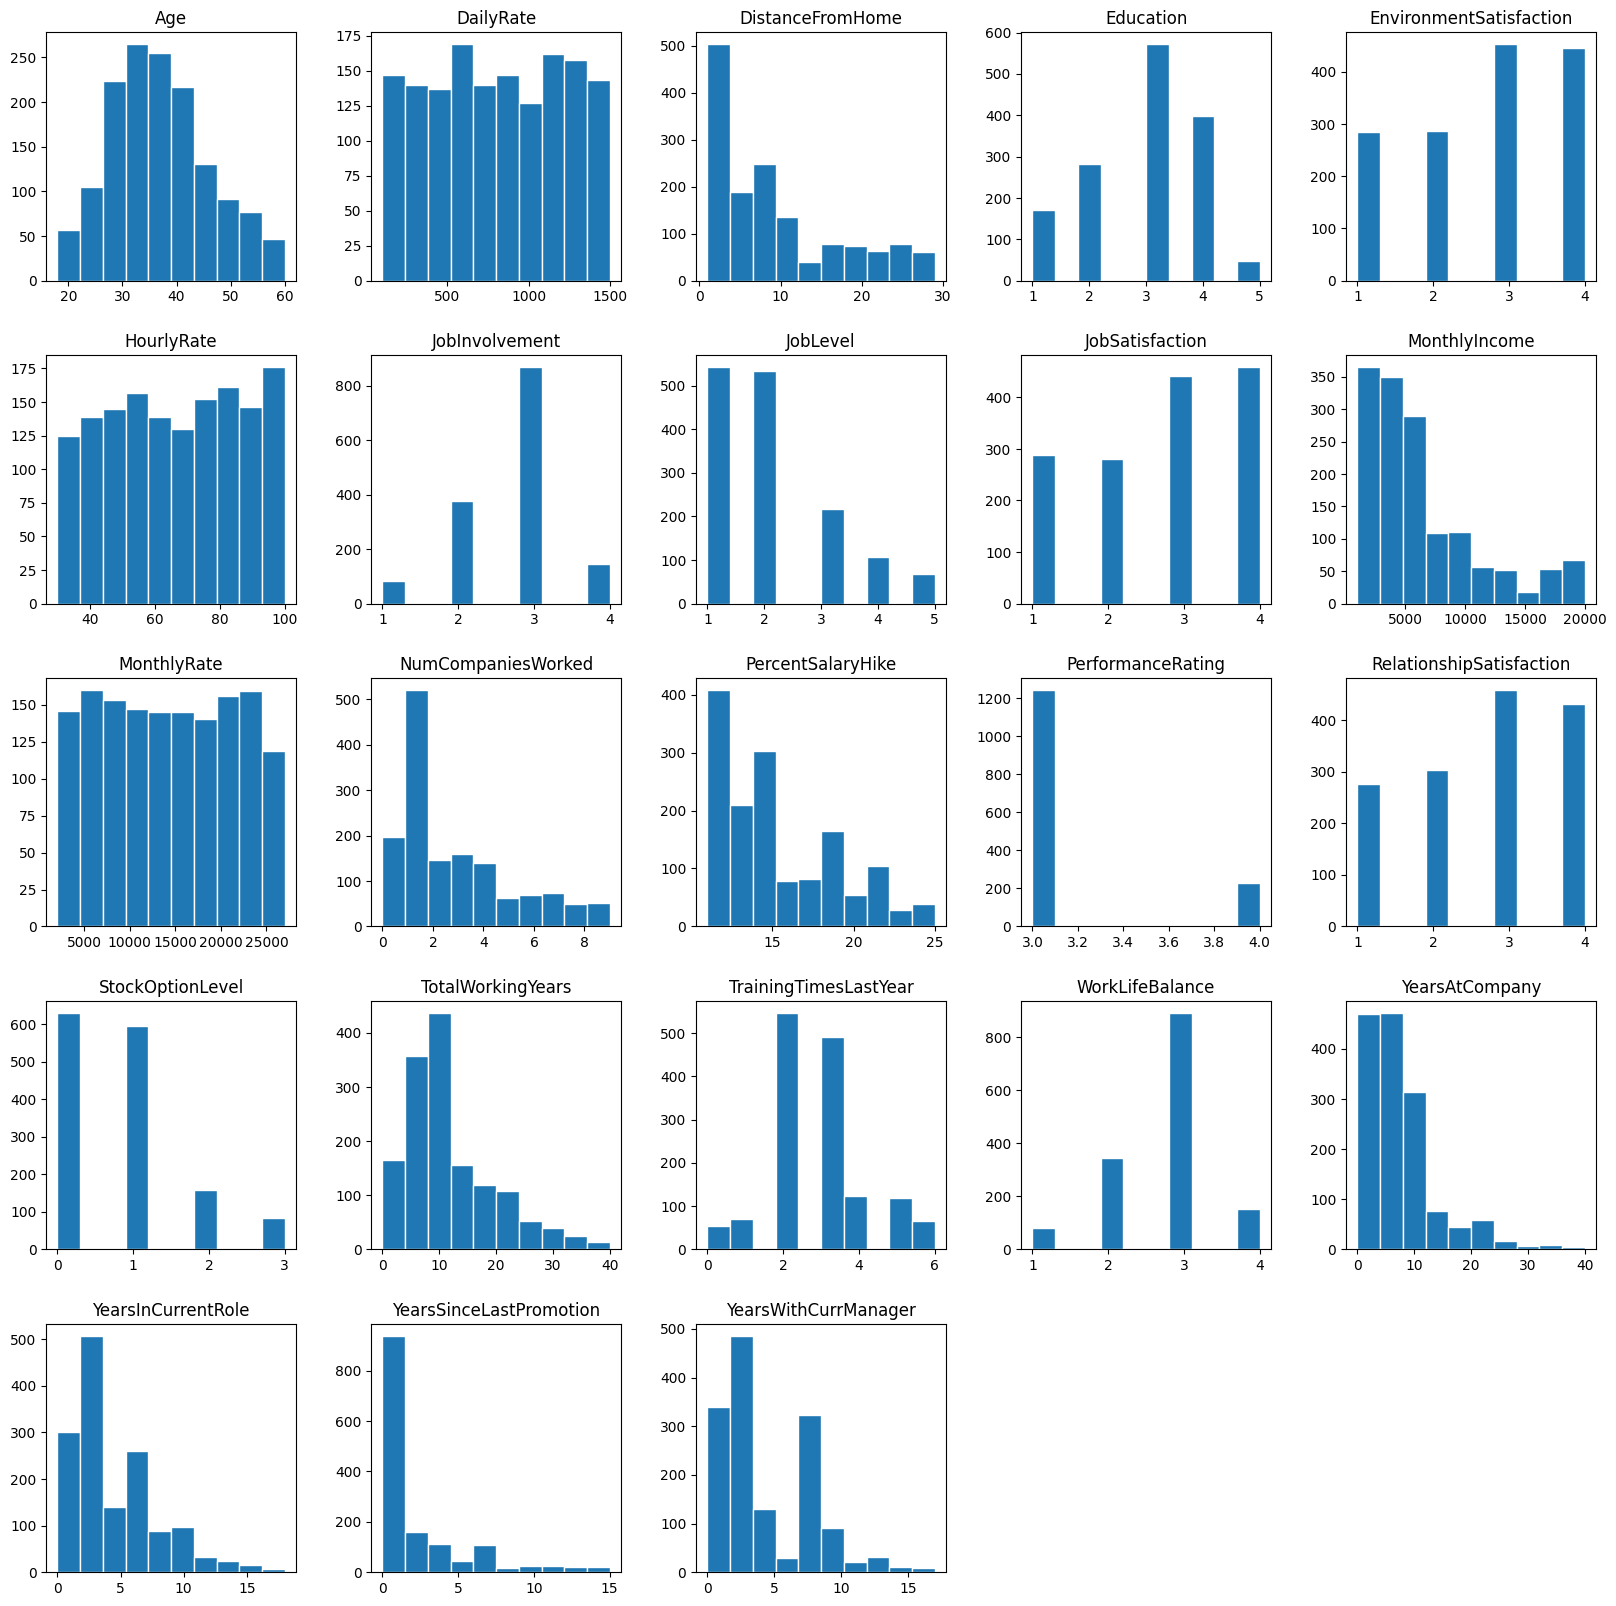

In [11]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='white', figsize=(20, 20), grid=False);

## Data Visualization


In [12]:
# Define the custom palette for "Yes" and "No"
custom_palette = {"No": "royalblue", "Yes": "tomato"}

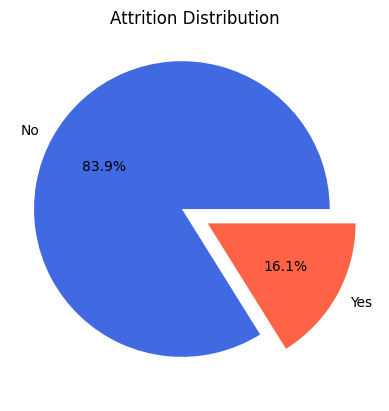

In [13]:
# Generate the pie chart
pie = df.groupby('Attrition')['Attrition'].count()
plt.pie(
    pie,
    explode=[0.1, 0.1],
    labels=['No', 'Yes'],
    autopct='%1.1f%%',
    colors=[custom_palette['No'], custom_palette['Yes']]
)
plt.title("Attrition Distribution")
plt.show()

In [14]:
"""# Group the data by Age and Attrition, and count the occurrences
age_attrition_counts = df.groupby(['Age', 'Attrition']).size().reset_index(name='Count')

# Calculate total counts per Age
total_counts = df.groupby('Age').size().reset_index(name='Total')
age_attrition_counts = age_attrition_counts.merge(total_counts, on='Age')

# Pivot the data to have separate columns for "Yes" and "No"
age_attrition_pivot = age_attrition_counts.pivot(index='Age', columns='Attrition', values='Count').fillna(0)

# Calculate Attrition percentage for each age group
age_attrition_pivot['Attrition %'] = (age_attrition_pivot['Yes'] / (age_attrition_pivot['Yes'] + age_attrition_pivot['No'])) * 100
age_attrition_pivot = age_attrition_pivot.reset_index()

# Plot the attrition percentage line
plt.figure(figsize=(12, 6))
plt.plot(age_attrition_pivot['Age'], age_attrition_pivot['Attrition %'], marker='o', color='royalblue', label='Attrition %')
plt.title('Attrition Percentage vs Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Attrition Percentage', fontsize=12)
plt.legend(title='Attrition %')
plt.xticks(ticks=age_attrition_pivot['Age'], labels=age_attrition_pivot['Age'], rotation=45)
plt.tight_layout()
plt.show()"""

'# Group the data by Age and Attrition, and count the occurrences\nage_attrition_counts = df.groupby([\'Age\', \'Attrition\']).size().reset_index(name=\'Count\')\n\n# Calculate total counts per Age\ntotal_counts = df.groupby(\'Age\').size().reset_index(name=\'Total\')\nage_attrition_counts = age_attrition_counts.merge(total_counts, on=\'Age\')\n\n# Pivot the data to have separate columns for "Yes" and "No"\nage_attrition_pivot = age_attrition_counts.pivot(index=\'Age\', columns=\'Attrition\', values=\'Count\').fillna(0)\n\n# Calculate Attrition percentage for each age group\nage_attrition_pivot[\'Attrition %\'] = (age_attrition_pivot[\'Yes\'] / (age_attrition_pivot[\'Yes\'] + age_attrition_pivot[\'No\'])) * 100\nage_attrition_pivot = age_attrition_pivot.reset_index()\n\n# Plot the attrition percentage line\nplt.figure(figsize=(12, 6))\nplt.plot(age_attrition_pivot[\'Age\'], age_attrition_pivot[\'Attrition %\'], marker=\'o\', color=\'royalblue\', label=\'Attrition %\')\nplt.title(\'Attr

In [15]:
def plot_attrition_dependency(df, feature, palette):
    """
    Plots a bar chart showing the distribution of Attrition for the specified feature
    with a percentage line for "Yes" Attrition.

    Args:
        df (DataFrame): The dataset.
        feature (str): The column name for the feature to plot against Attrition.
        palette (dict): Custom color palette for Attrition categories.
    """
    # Calculate counts and percentages
    attrition_counts = df.groupby([feature, 'Attrition']).size().reset_index(name='Count')
    total_counts = df.groupby(feature).size().reset_index(name='Total')
    attrition_counts = attrition_counts.merge(total_counts, on=feature)
    attrition_counts['Attrition %'] = (attrition_counts['Count'] / attrition_counts['Total']) * 100

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue='Attrition', palette=palette)

    # Filter data for "Yes" attrition and prepare for plotting the percentage line
    attrition_yes = attrition_counts[attrition_counts['Attrition'] == 'Yes']

    # Ensure x-axis values match the bar plot's categorical ordering
    categories = df[feature].unique()  # Get unique feature categories in the order of appearance
    attrition_yes = attrition_yes.set_index(feature).reindex(categories).reset_index()

    # Plot the percentage line
    plt.plot(attrition_yes[feature], attrition_yes['Attrition %'], marker='o', linestyle='-', color='black', label='Attrition % (Yes)')

    # Add percentage annotations to the line
    for i, row in attrition_yes.iterrows():
        if not pd.isna(row['Attrition %']):  # Avoid annotating missing data
            plt.text(x=i, y=row['Attrition %'] + 15, s=f'{row["Attrition %"]:.1f}%', ha='center', fontsize=10, color='black')

    # Adjust y-axis to fit all annotations
    plt.ylim(0, max(attrition_counts['Count'].max(), attrition_yes['Attrition %'].max() + 10))

    # Add title, labels, legend, and adjust x-axis tick rotation
    plt.title(f'{feature} vs. Attrition', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count of Employees', fontsize=12)
    plt.legend(title='Attrition', loc='upper right')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

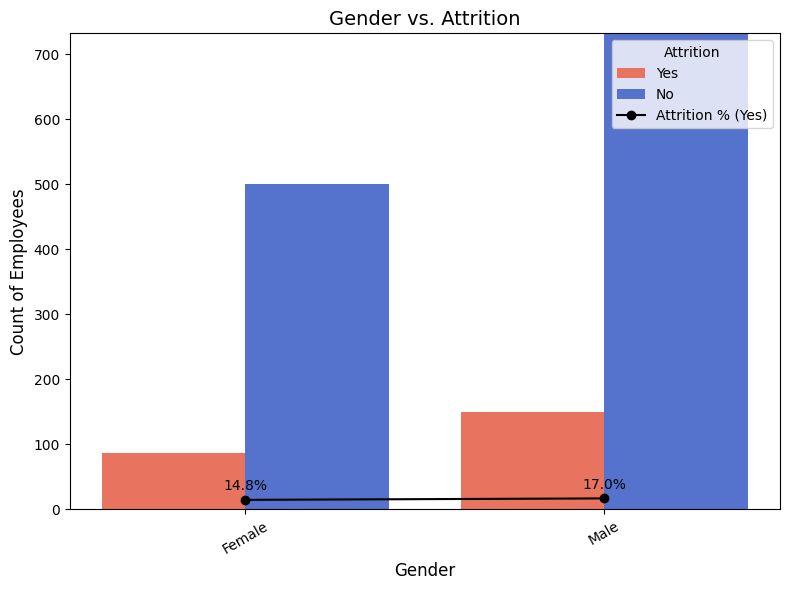

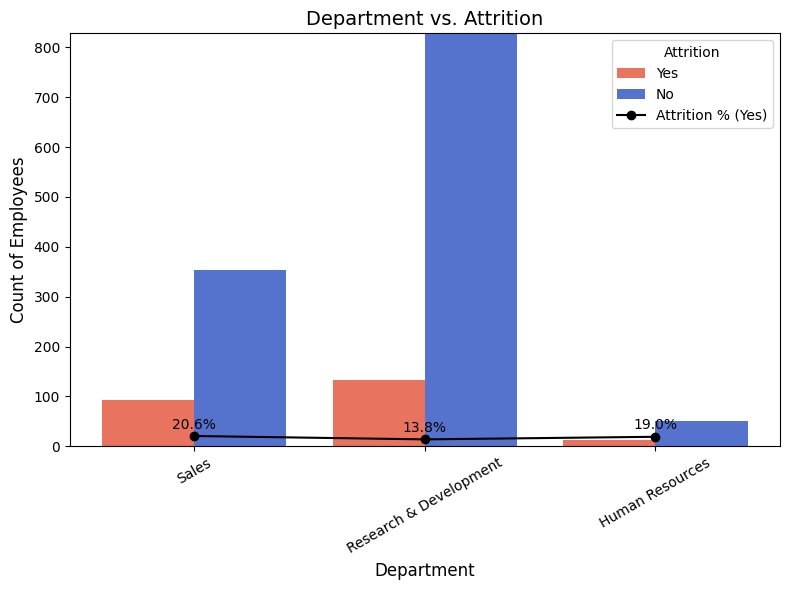

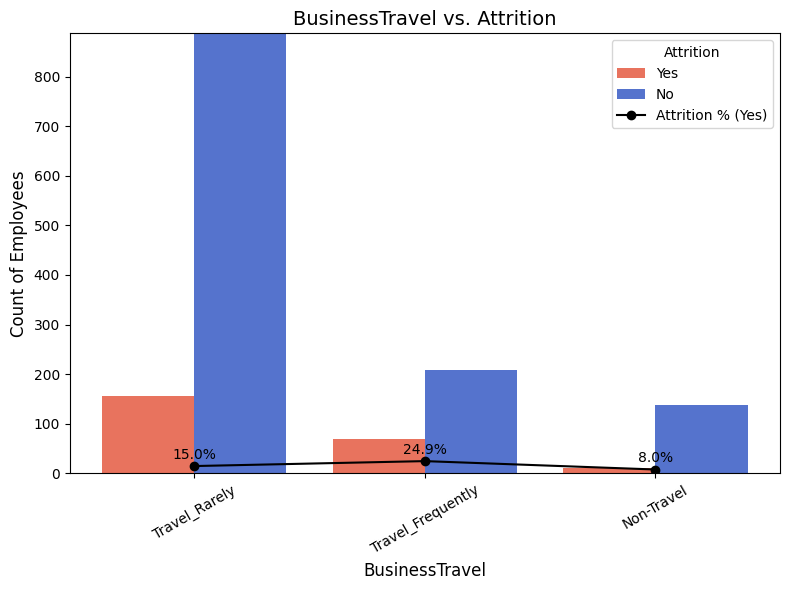

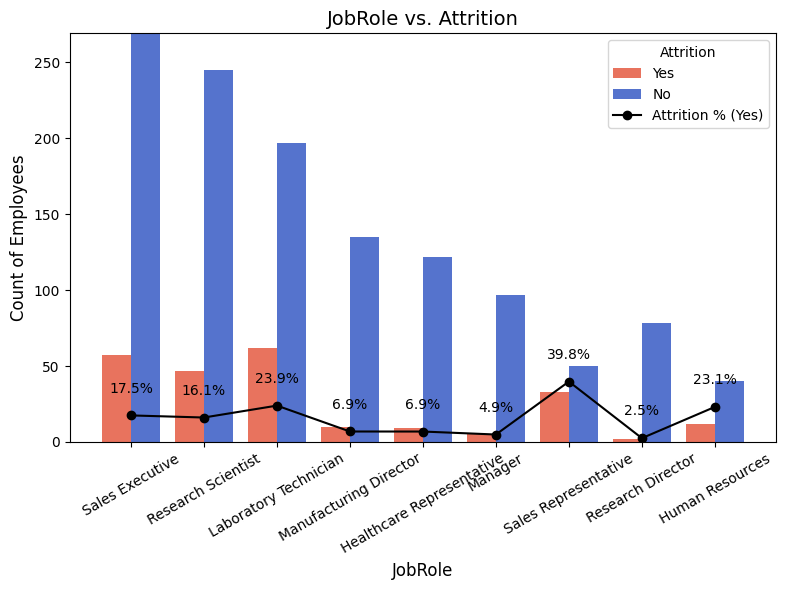

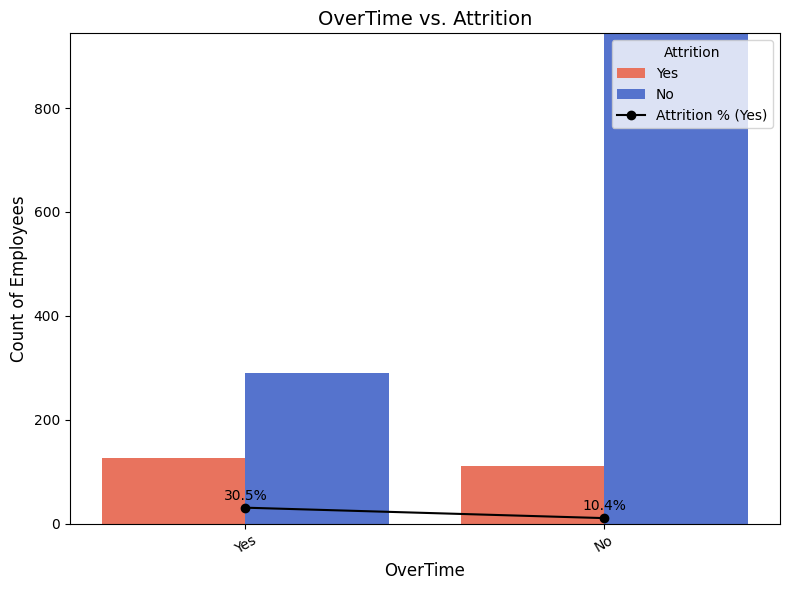

In [16]:

plot_attrition_dependency(df, 'Gender', custom_palette)
# 2. Attrition vs Department
plot_attrition_dependency(df, 'Department', custom_palette)

# 1. Attrition vs BusinessTravel
plot_attrition_dependency(df, 'BusinessTravel', custom_palette)

# 3. Attrition vs JobRole
plot_attrition_dependency(df, 'JobRole', custom_palette)

# 4. Attrition vs OverTime
plot_attrition_dependency(df, 'OverTime', custom_palette)

In [17]:
def plot_attrition_boxplot(df, y_variable, palette):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Attrition', y=y_variable, palette=palette)  # Box plot for the variable by Attrition
    plt.title(f'{y_variable} vs Attrition', fontsize=14)  # Title dynamically set based on variable
    plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])  # Label x-axis categories
    plt.xlabel('Attrition', fontsize=12)  # x-axis label
    plt.ylabel(y_variable, fontsize=12)  # y-axis label dynamically set
    plt.tight_layout()
    plt.show()

<ipython-input-17-a3a237d908cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=y_variable, palette=palette)  # Box plot for the variable by Attrition


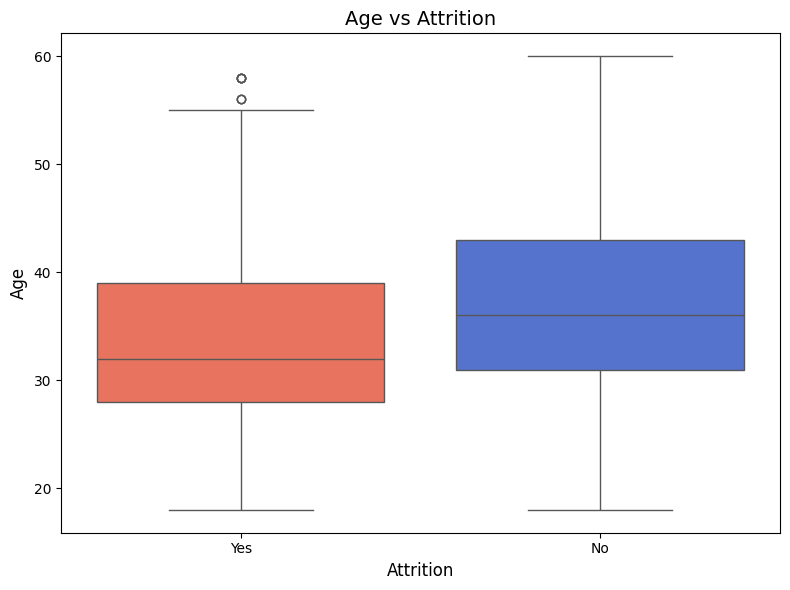

<ipython-input-17-a3a237d908cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=y_variable, palette=palette)  # Box plot for the variable by Attrition


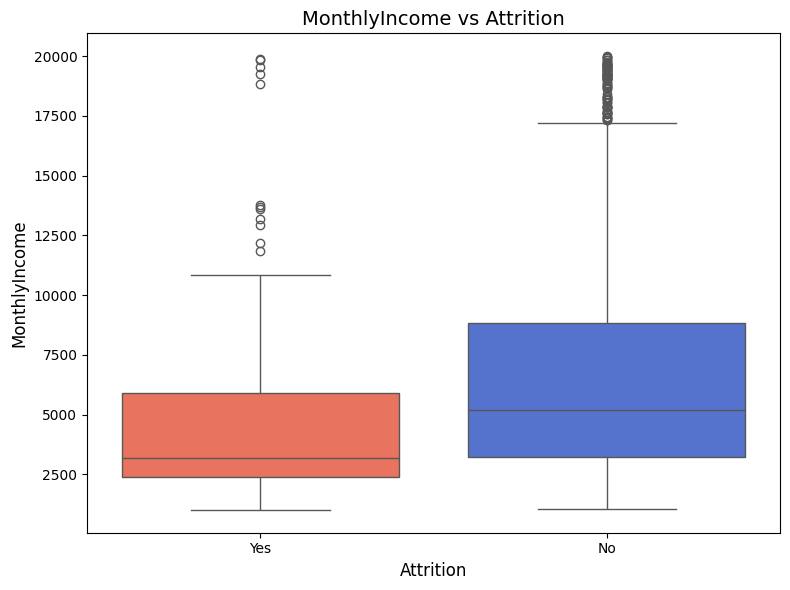

<ipython-input-17-a3a237d908cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=y_variable, palette=palette)  # Box plot for the variable by Attrition


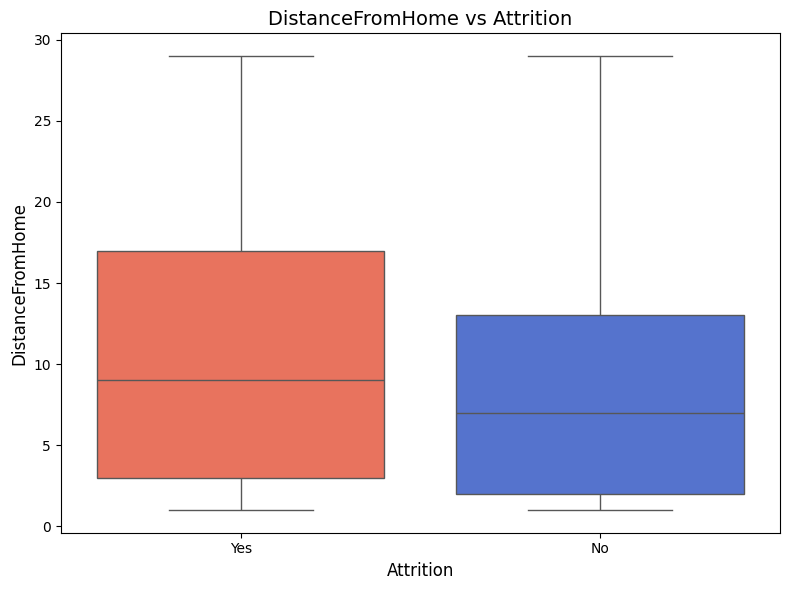

<ipython-input-17-a3a237d908cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=y_variable, palette=palette)  # Box plot for the variable by Attrition


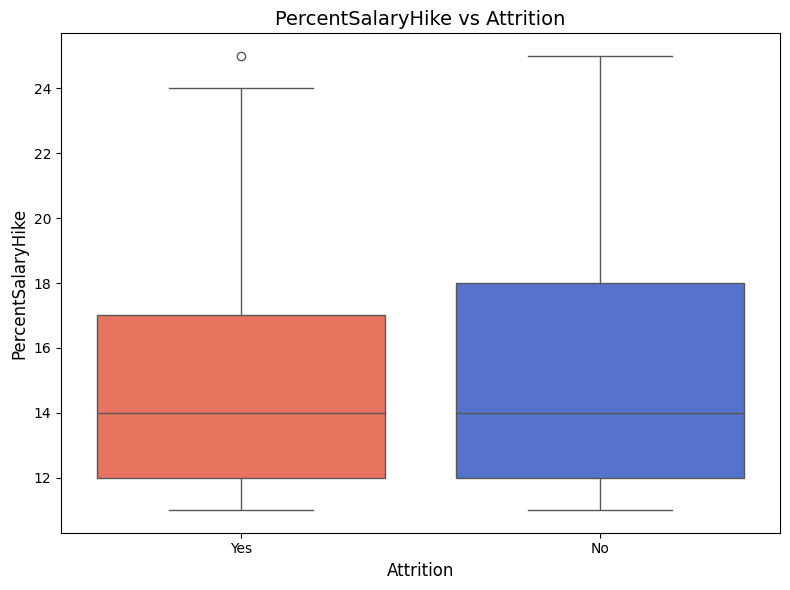

In [18]:
# Age vs Attrition
plot_attrition_boxplot(df, 'Age', custom_palette)

# MonthlyIncome vs Attrition
plot_attrition_boxplot(df, 'MonthlyIncome', custom_palette)

# DistanceFromHome vs Attrition
plot_attrition_boxplot(df, 'DistanceFromHome', custom_palette)

# PercentSalaryHike vs Attrition
plot_attrition_boxplot(df, 'PercentSalaryHike', custom_palette)




**Conclusions:**

***
- **Age**: The younger workers are more likely to quit then other employees. Additional peak at 58 years old.

- **BusinessTravel** : The workers who travel frequently are more likely to quit than other employees.

- **Department** : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- **Gender** : The `Male` are more likely to quit.

- **DistanceFromHome** : The workers working further from home are more likely to quit than other employees.

- **JobRole** : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- **OverTime** : The workers who work more hours are likely to quit then others.

***

### Outliers

In [19]:
data_num = df.select_dtypes(include = ['int64', 'float64'])


In [20]:
#Function to create a BoxPlot and visualise:All Points in the Variable and Suspected Outliers in the variable

def OutLiersBox(df,nameOfFeature):

    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(color = 'rgb(7,40,89)'),line = dict(color = 'rgb(7,40,89)')
    )


    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers', # define the suspected Outliers
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(outliercolor = 'rgba(219, 64, 82, 0.6)',outlierwidth = 2)),line = dict(color = 'rgb(8,81,156)')
    )


    data = [trace0,trace1]
    layout = go.Layout(title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    fig.show()

In [21]:
for item in range(0,len(data_num.columns)):
    OutLiersBox(data_num, data_num.columns[item])
    print('--------------------------------------------------------')

--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


--------------------------------------------------------


**Suspicious outliers on:**

NumCompaniesWorked`, MonthlyIncome, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany,YearsInCurrentRole and YearsSinceLastPromotion


I will drop the StockOptionLevel and TrainingTimesLastYear.

In [22]:
# Outlier Treatment
def outlier_treatment(df, colname):
    Q1, Q3 = np.percentile(df[colname], [25, 75])
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    df_clean = df[(df[colname] >= lower_limit) & (df[colname] <= upper_limit)]
    print('Shape of the raw data:', df.shape)
    print('Shape of the cleaned data:', df_clean.shape)
    return df_clean

for col in ['StockOptionLevel', 'TrainingTimesLastYear', 'DistanceFromHome']:
    df = outlier_treatment(df, col)

Shape of the raw data: (1470, 31)
Shape of the cleaned data: (1385, 31)
Shape of the raw data: (1385, 31)
Shape of the cleaned data: (1159, 31)
Shape of the raw data: (1159, 31)
Shape of the cleaned data: (1159, 31)


# Feature Engineering


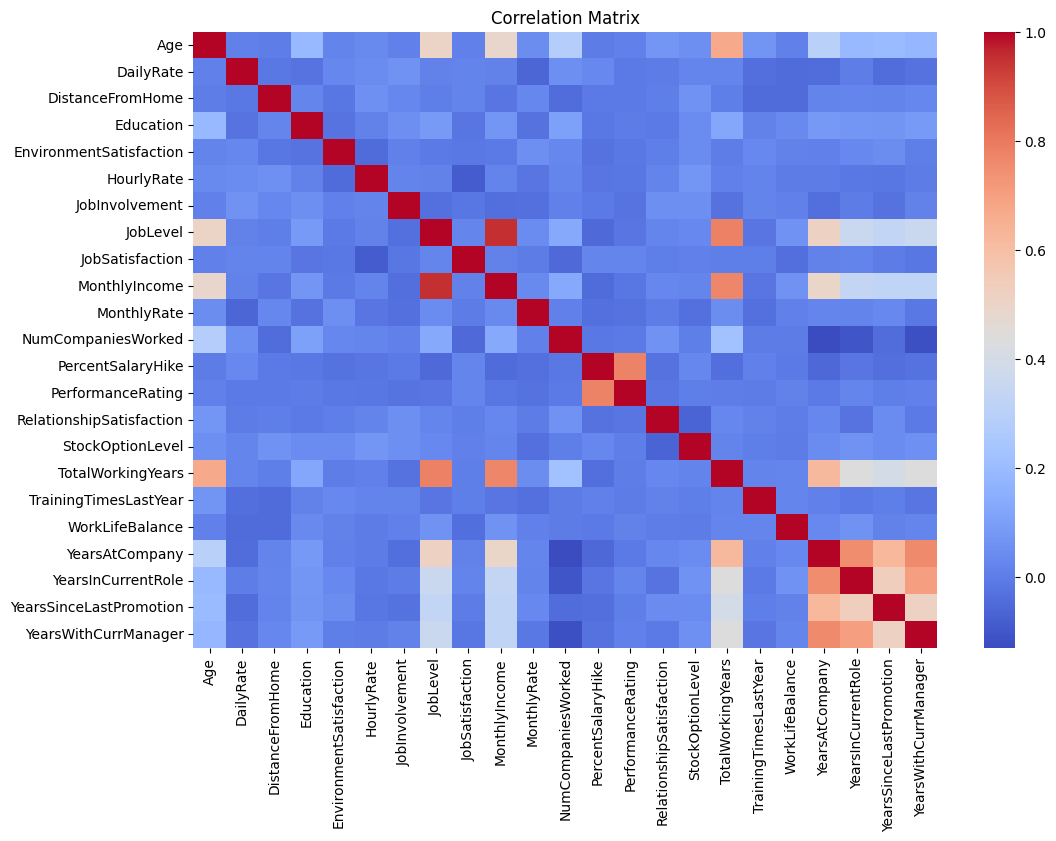

In [23]:
# Correlation heatmap to visualize relationships between numerical variables
correlation_matrix = df.select_dtypes(include=[np.number]).corr()  # Select only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

##Analysis of correlation results :¶

- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.


# Machine Learning modelling


###Prepare data for modeling

In [24]:
# Encode categorical variables
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

categorical_cols = ['BusinessTravel', 'EducationField', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df = pd.get_dummies(df, columns=categorical_cols)

# Prepare data for modeling
X = df.drop(columns=['Attrition'])
y = df['Attrition']

#We keep stratify=y to maintain the proportion of classes in each split(important for imbalanced data).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("\nClass distribution in y_train:\n", y_train.value_counts())


Class distribution in y_train:
 Attrition
0    680
1    131
Name: count, dtype: int64


In [25]:
#Handle Imbalanced Data (SMOTE) as its creates synthetic examples of the minority class.
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nBefore SMOTE:")
print("Class distribution in y_train:\n", y_train.value_counts())
print("\nAfter SMOTE:")
print("Class distribution in y_train_res:\n", y_train_res.value_counts())



Before SMOTE:
Class distribution in y_train:
 Attrition
0    680
1    131
Name: count, dtype: int64

After SMOTE:
Class distribution in y_train_res:
 Attrition
0    680
1    680
Name: count, dtype: int64


##Logistic Regression

Logistic regression is used when the target variable is binary (e.g., Attrition: Yes or No). It helps us predict the likelihood of an employee leaving the company based on various features.







In [26]:
# Logistic regression is sensitive to feature scales. Standardizing features ensures they are on the same scale.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train_res)

y_pred_log = log_reg.predict(X_test_scaled)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       292
           1       0.54      0.38      0.44        56

    accuracy                           0.85       348
   macro avg       0.71      0.66      0.68       348
weighted avg       0.83      0.85      0.84       348


Logistic Regression Accuracy: 0.8477011494252874


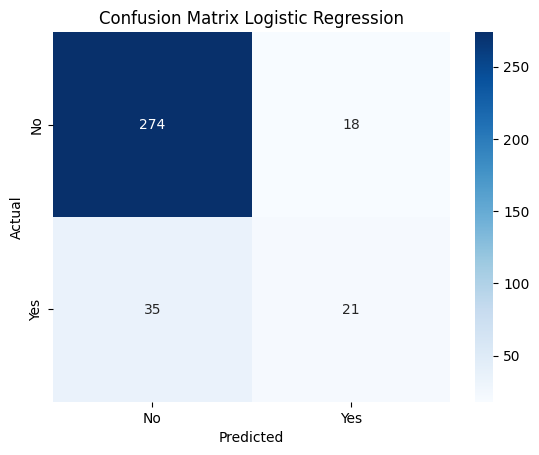

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-28-a696fd1517d0>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




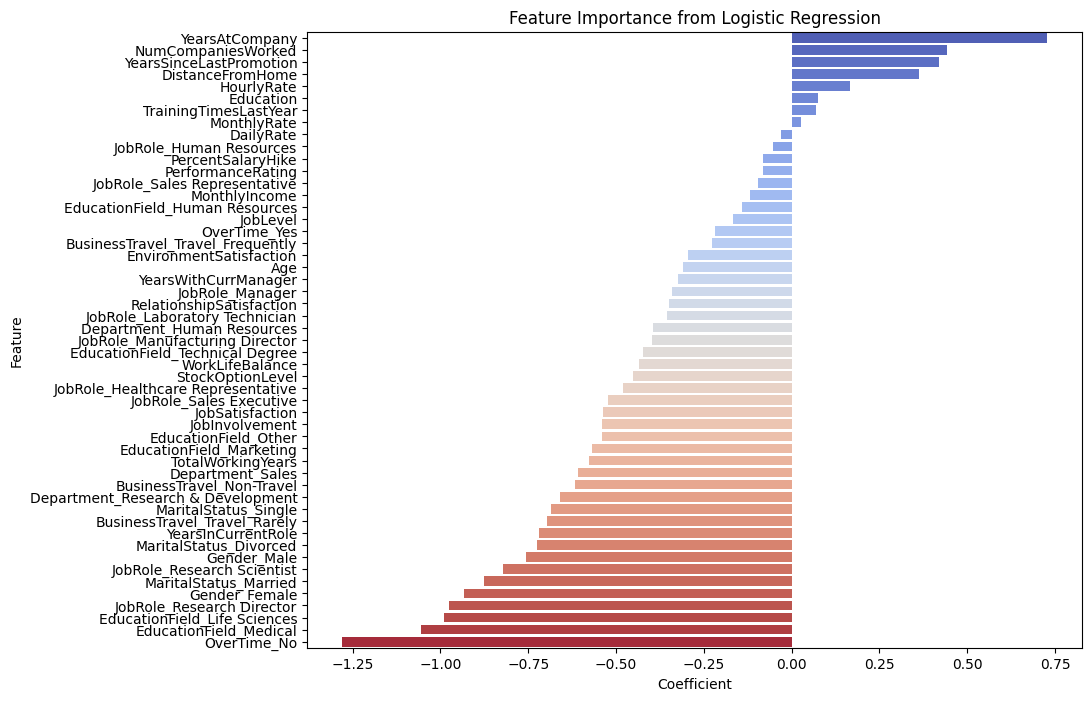

In [28]:
# Feature importance by Logistic regression coefficients represent the impact of each feature on the target variable (attrition). Higher coefficients indicate a stronger influence.

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Bar plot for feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Importance from Logistic Regression')
plt.show()

##Random Forest

In [29]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train_res, y_train_res)
best_rf = rf_grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       292
           1       0.48      0.23      0.31        56

    accuracy                           0.84       348
   macro avg       0.67      0.59      0.61       348
weighted avg       0.80      0.84      0.81       348

Random Forest Accuracy: 0.8362068965517241


In [30]:
# Cross-Validation for Random Forest
cv_scores_rf = cross_val_score(best_rf, X_train_res, y_train_res, cv=5)
print(f"Random Forest CV Scores: {cv_scores_rf}")
print(f"Mean CV Score: {cv_scores_rf.mean():.3f}")

Random Forest CV Scores: [0.6875     0.97058824 0.98897059 0.97058824 0.97794118]
Mean CV Score: 0.919


<ipython-input-31-00b41ffb0f0d>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




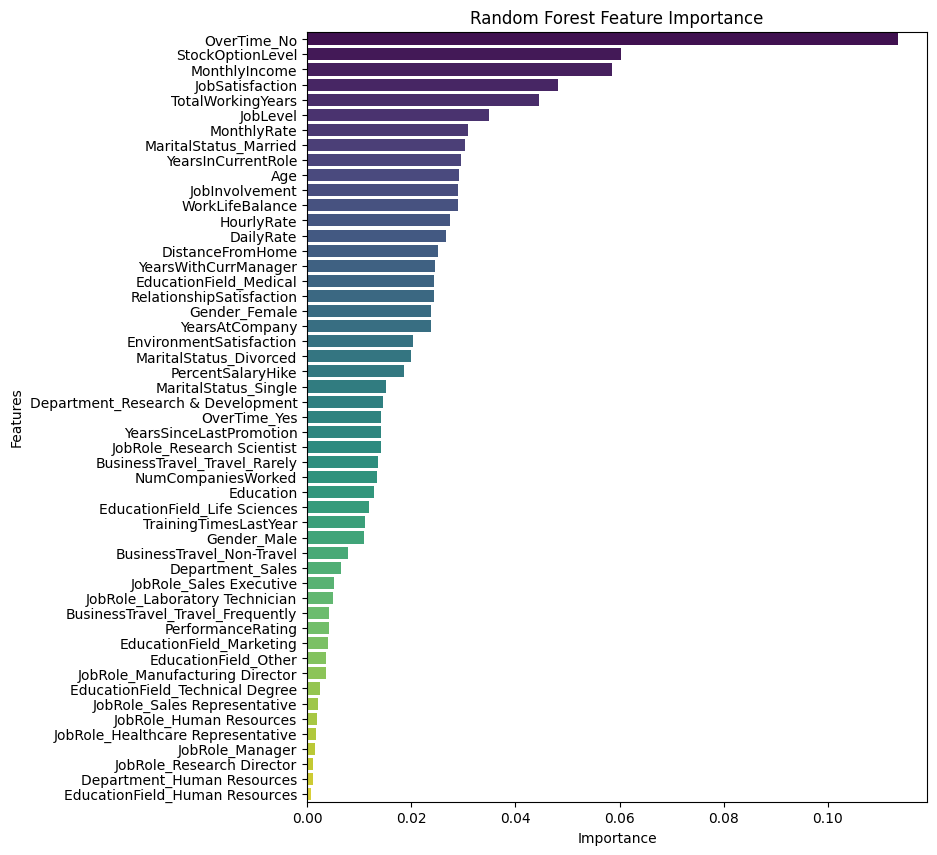

In [31]:
# Feature importance from the best Random Forest model
importances = best_rf.feature_importances_
feat_import_df = pd.DataFrame({
    'Features': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 10))
sns.barplot(data=feat_import_df, x='Importance', y='Features', palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

###Decision Tree

In [32]:
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1)
dt_grid_search.fit(X_train_res, y_train_res)
best_dt = dt_grid_search.best_estimator_

y_pred_dt = best_dt.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       292
           1       0.32      0.41      0.36        56

    accuracy                           0.76       348
   macro avg       0.60      0.62      0.61       348
weighted avg       0.79      0.76      0.77       348



In [33]:
# Cross-Validation
cv_scores_dt = cross_val_score(best_dt, X_train_res, y_train_res, cv=5)
print(f"Decision Tree CV Scores: {cv_scores_dt}")
print(f"Mean CV Score: {cv_scores_dt.mean():.3f}")


Decision Tree CV Scores: [0.66911765 0.875      0.87867647 0.91911765 0.91176471]
Mean CV Score: 0.851


In [34]:
# Decision Tree Evaluation
y_pred_dt = best_dt.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       292
           1       0.32      0.41      0.36        56

    accuracy                           0.76       348
   macro avg       0.60      0.62      0.61       348
weighted avg       0.79      0.76      0.77       348

Decision Tree Accuracy: 0.7614942528735632


<ipython-input-35-d675c7c69116>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




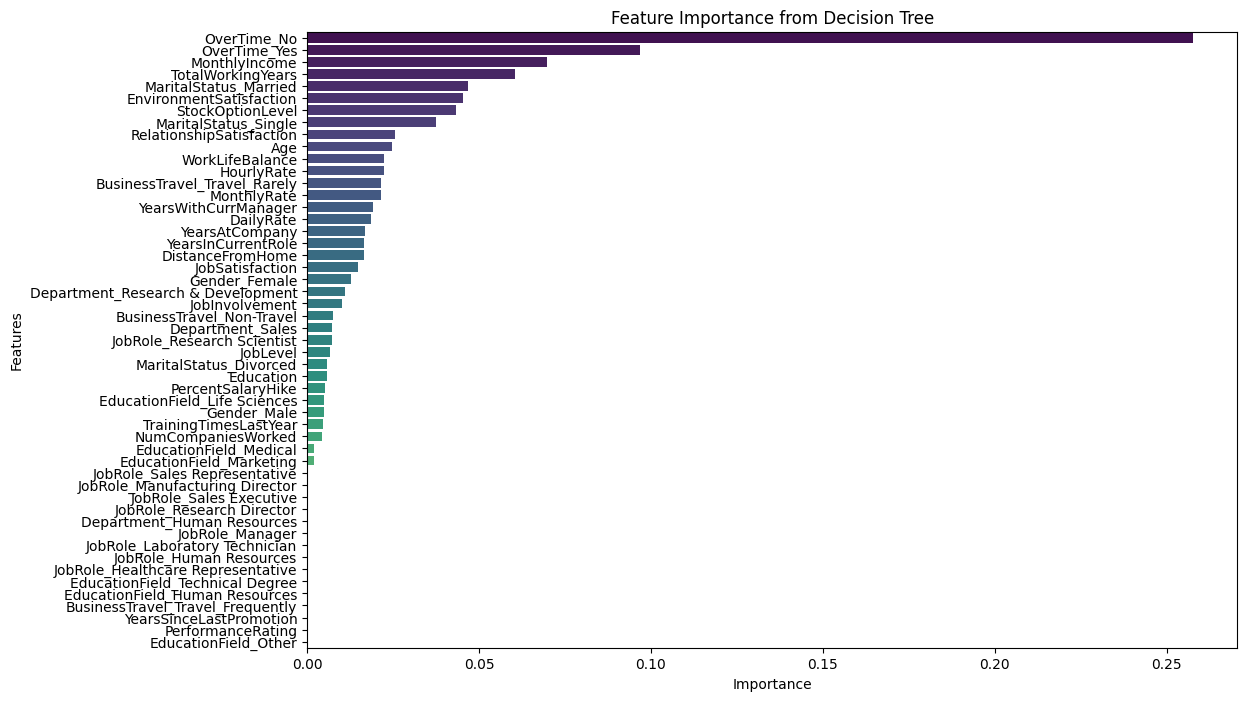

In [35]:
# Feature Importance for Decision Tree

dt_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=dt_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

##Model Comparison:

In [36]:
from sklearn.metrics import roc_auc_score

models = {
    'Logistic Regression': log_reg,
    'Random Forest': best_rf,
    'Decision Tree': best_dt
}

for name, model in models.items():
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    print(f"{name}: ROC AUC = {roc_auc:.3f}")

Logistic Regression: ROC AUC = 0.547
Random Forest: ROC AUC = 0.592
Decision Tree: ROC AUC = 0.620


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



# Understanding ROC AUC

**ROC AUC (Receiver Operating Characteristic Area Under the Curve):**  
This metric measures a model's ability to distinguish between classes (e.g., predicting "Attrition" vs. "No Attrition").  

**The AUC value ranges from 0 to 1:**  
- **0.5:** The model performs no better than random guessing.  
- **> 0.5:** The model is better than random guessing, with higher values indicating better performance.  
- **< 0.5:** The model performs worse than random guessing (unlikely for common ML models).  

**In our case:**  
- **Logistic Regression AUC:** 0.547 (slightly better than random guessing).  
- **Random Forest AUC:** 0.592 (better than logistic regression).  
- **Decision Tree AUC:** 0.620 (best performance among the three models).

# Decision Tree Outperforms Others

The decision tree's better performance suggests that non-linear patterns and feature thresholds might play a role.

## Next Steps to Improve Performance:
1. **Feature Engineering:**  
   To add new or transform features

2. **Hyperparameter Tuning:**  
   Optimize hyperparameters for all models to improve performance

3. **Try Advanced Models:**  
   Test gradient boosting models (e.g., XGBoost, LightGBM) or ensemble techniques.

4. **Refine Feature Selection:**  
   Use feature importance from the decision tree or random forest to identify and eliminate irrelevant features.

##**Step 4: Multivariate Regression: Understanding Job Satisfaction**

In [37]:
#Multivariate regression helps us understand how multiple independent variables (predictors) influence a continuous dependent variable (outcome).
#We select a set of independent variables (features) that are believed to influence Job Satisfaction.


In [66]:
# Select features and target variable
# Replace these column names with the actual column names from your dataset
X = df_copy[['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 'OverTime']]
y = df_copy['JobSatisfaction']

In [67]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')


# Handle missing values
df_clean = pd.concat([X, y], axis=1).dropna()
X = df_clean.drop(columns=['JobSatisfaction'])
y = df_clean['JobSatisfaction']

X['OverTime_Yes'] = X['OverTime_Yes'].astype(int)


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle imbalanced data using SMOTE (if applicable)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Convert SMOTE output back to DataFrame for consistency
X_train_res = pd.DataFrame(X_train_res, columns=X.columns)
y_train_res = pd.Series(y_train_res, name='JobSatisfaction')

# Add a constant term for OLS regression
X_train_res = sm.add_constant(X_train_res)

# Check Variance Inflation Factor (VIF) for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_res.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_res.values, i) for i in range(X_train_res.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
            feature        VIF
0             const  20.354294
1               Age   1.401608
2     MonthlyIncome   1.747350
3  DistanceFromHome   1.002129
4    YearsAtCompany   1.417376
5      OverTime_Yes   1.001368


                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.367
Date:                Fri, 24 Jan 2025   Prob (F-statistic):            0.00164
Time:                        22:07:00   Log-Likelihood:                -1919.7
No. Observations:                1260   AIC:                             3849.
Df Residuals:                    1255   BIC:                             3875.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.2596      0.141  

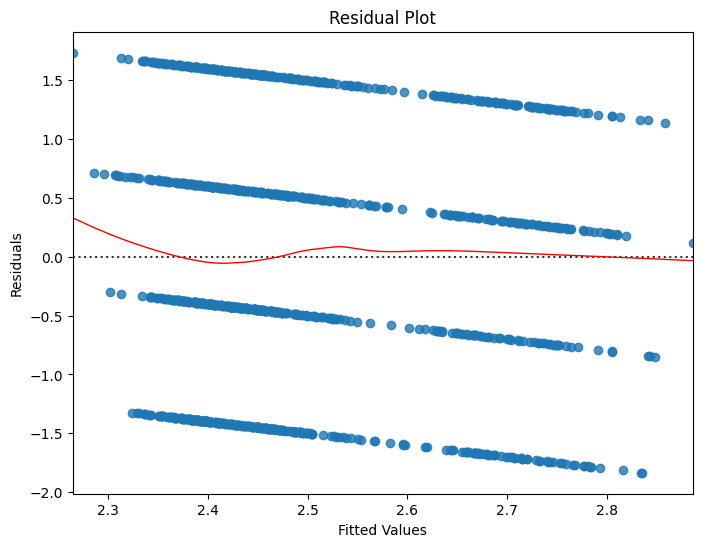

In [71]:
# Drop highly collinear variables (e.g., if VIF > 10)
if 'YearsAtCompany' in X_train_res.columns:  # Example of high VIF handling
    X_train_res = X_train_res.drop(columns=['YearsAtCompany'])

# Fit the OLS model
model = sm.OLS(y_train_res, X_train_res).fit()

# Display the updated regression summary
print(model.summary())

# Visualize residuals to check assumptions
plt.figure(figsize=(8, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

###OLS Regression Results:

-	Significant Predictors:
-	OverTime: Strongly negatively affects job satisfaction.
-	Monthly Income: Positively influences job satisfaction.
-	Job Level: Positively influences job satisfaction.
-	Adjusted R² = 0.42:This means the model explains 42% of the variation in job satisfaction, which is decent but leaves room for improvement (e.g., by adding more predictors or exploring non-linear relationships).

###Interpretation:

1.	Employees working overtime have lower job satisfaction. This suggests that overtime impacts work-life balance negatively.
2.	Higher income and job levels are positively associated with job satisfaction, reinforcing the importance of fair compensation and clear career progression."

##**Step 5: ANOVA: Comparing Job Satisfaction Across Departments**


In [75]:
from sklearn.preprocessing import MinMaxScaler
# Scale 'JobSatisfaction' to the range 0-1
scaler = MinMaxScaler()
df_copy['JobSatisfaction'] = scaler.fit_transform(df_copy[['JobSatisfaction']])


In [78]:
def remove_outliers(group):
    q1 = group['JobSatisfaction'].quantile(0.25)
    q3 = group['JobSatisfaction'].quantile(0.75)
    # 3. Group data by Department
groups = [group['JobSatisfaction'].values for name, group in df_copy.groupby('Department')]

# Check if there are at least two groups with data
if len(groups) < 2:
    print("Not enough groups for ANOVA analysis.")
else:
    # Perform the one-way ANOVA
    anova_results = f_oneway(*groups)
    print("ANOVA Results:")
    print("F-statistic:", anova_results.statistic)
    print("P-value:", anova_results.pvalue)

    # Interpretation:
    # - If p-value < 0.05, there's a significant difference between the departments' job satisfaction.
    # - If p-value >= 0.05, we cannot reject the null hypothesis, indicating no significant difference.

    if anova_results.pvalue < 0.05:
        print("Significant differences in job satisfaction across departments.")
    else:
        print("No significant differences in job satisfaction across departments.")


ANOVA Results:
F-statistic: 0.5021228767277308
P-value: 0.6053484180286459
No significant differences in job satisfaction across departments.


# Insights:
- Significant p-value (< 0.05) in ANOVA suggests job satisfaction differs by department.Thsi is not the case
- Departments with lower satisfaction should be prioritized for engagement initiatives.


## **Key Insights from the Analysis**

- **Multivariate Regression: Understanding Job Satisfaction**
  - **Significant Predictors:**
    - **OverTime:** Strongly negatively affects job satisfaction. Employees working overtime report lower satisfaction, likely due to poor work-life balance.
    - **Monthly Income:** Positively influences job satisfaction, highlighting the importance of fair and competitive compensation.
    - **Job Level:** Higher job levels are associated with greater job satisfaction, emphasizing the need for clear career progression.
  - **Adjusted R²:** The model explains **42%** of the variation in job satisfaction, which is decent but leaves room for improvement.


- **ANOVA: Comparing Job Satisfaction Across Departments**
  - **Result:** No significant differences in job satisfaction across departments (P-value = 0.605). This indicates that department-level interventions are not required to address differences in job satisfaction.

- **Attrition Analysis Highlights:**
  - **Age:** Younger employees are more likely to leave, with an additional peak observed around 58 years old.
  - **OverTime:** Employees working overtime are more likely to quit.
  - **Job Role:** Roles like "Laboratory Technician," "Sales Representative," and "Human Resources" show higher attrition rates.
  - **BusinessTravel:** Employees who travel frequently are more likely to leave.
  - **DistanceFromHome:** Employees living farther from the workplace are at higher risk of attrition.

## **Insight for Improvement**

- **Address Overtime-Related Issues**
  - **Insight:** Overtime significantly reduces job satisfaction and increases attrition risk.

- **Focus on Compensation and Career Growth**
  - **Insight:** Higher income and job levels are associated with greater satisfaction.

- **Retention Programs for Younger Employees**
  - **Insight:** Younger employees are more likely to quit.

- **Monitor and Optimize Key Predictors**
  - **Insight:** Factors like job role, travel requirements, and distance from home significantly influence attrition.


- **Improve Prediction Models**
  - **Challenges:**
    - The current logistic regression model shows moderate predictive performance (accuracy ~54.7%).
  - **Future Steps:**
    - Explore non-linear models such as Gradient Boosting, Random Forests, or XGBoost.
    - Perform advanced feature engineering to capture interactions between predictors.
    - Use hyperparameter tuning to optimize model performance.


